# **Exploratory Data Analysis of Indian Premier League**

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

**Examining the source file**

In [2]:
file=pd.read_csv(r'/content/deliveries.csv',encoding='latin1')
file.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


**Examining the second source file**

In [3]:
file2=pd.read_csv('/content/matches.csv')
file2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**Data Cleaning**

In [4]:
file2.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
file2.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
file2.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
file2.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

***Examining the Tournament's total statistics***

**Analysis of the Tournament Locations**

Top 15 Cities with the maximum number of Matches Played:
              city  Match Counts
23         Mumbai           101
21        Kolkata            77
10          Delhi            74
2       Bangalore            66
14      Hyderabad            64
8         Chennai            57
16         Jaipur            47
7      Chandigarh            46
26           Pune            38
12         Durban            15
3       Bengaluru            14
31  Visakhapatnam            13
1       Ahmedabad            12
6       Centurion            12
22         Mohali            10
28         Rajkot            10
11     Dharamsala             9
15         Indore             9
17   Johannesburg             8
5       Cape Town             7


Text(0.5, 1.0, 'Top Cities that have hosted IPL Matches')

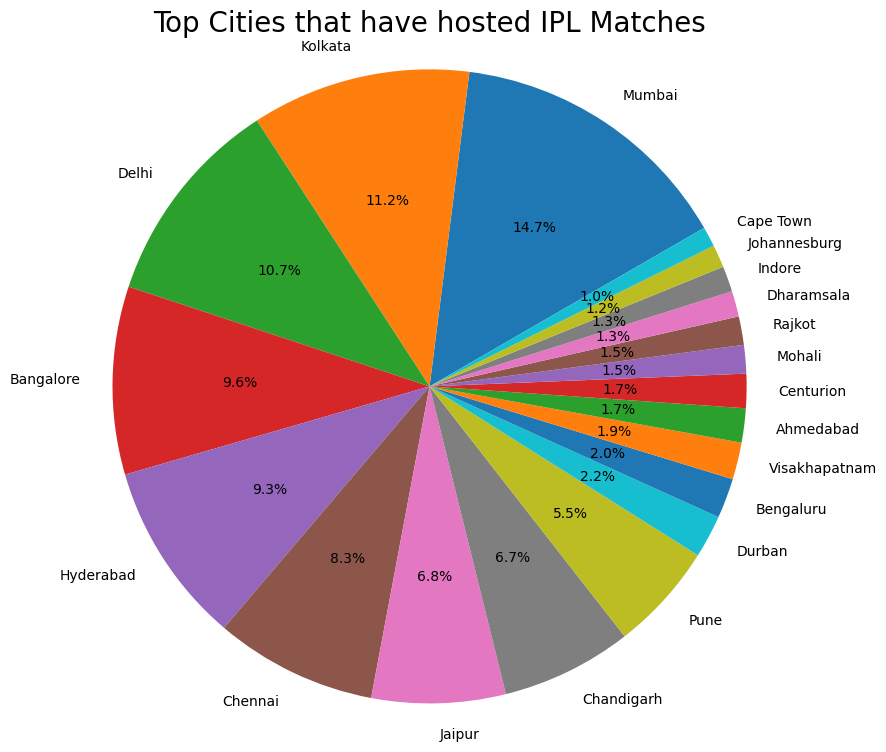

In [5]:
city_counts=file2.groupby('city').apply(lambda x:x['city'].count()).reset_index(name='Match Counts')
top_cities_order=city_counts.sort_values(by='Match Counts',ascending=False)
top_cities=top_cities_order[:20]
print('Top 15 Cities with the maximum number of Matches Played:\n',top_cities)
plt.figure(figsize=(9,9))
plt.pie(top_cities['Match Counts'],labels=top_cities['city'],autopct='%1.1f%%', startangle=30)
plt.axis('equal')
plt.title('Top Cities that have hosted IPL Matches',size=20)

**The Top 20 locations where the most IPL games have been played are listed below.**

Top 20 Stadiums with the maximum number of Matches Played:
                                                 venue  Match Counts
15                             M. Chinnaswamy Stadium            80
8                                        Eden Gardens            77
9                                    Feroz Shah Kotla            74
34                                   Wankhede Stadium            73
23                 Rajiv Gandhi International Stadium            64
16                           M.A. Chidambaram Stadium            57
22                 Punjab Cricket Association Stadium            56
26                             Sawai Mansingh Stadium            47
17            Maharashtra Cricket Association Stadium            21
5                          Dr DY Patil Sports Academy            17
31                         Subrata Roy Sahara Stadium            17
14                                          Kingsmead            15
32                                    SuperSport Park   

Text(0.5, 1.0, 'Top Stadiums that have hosted IPL Matches')

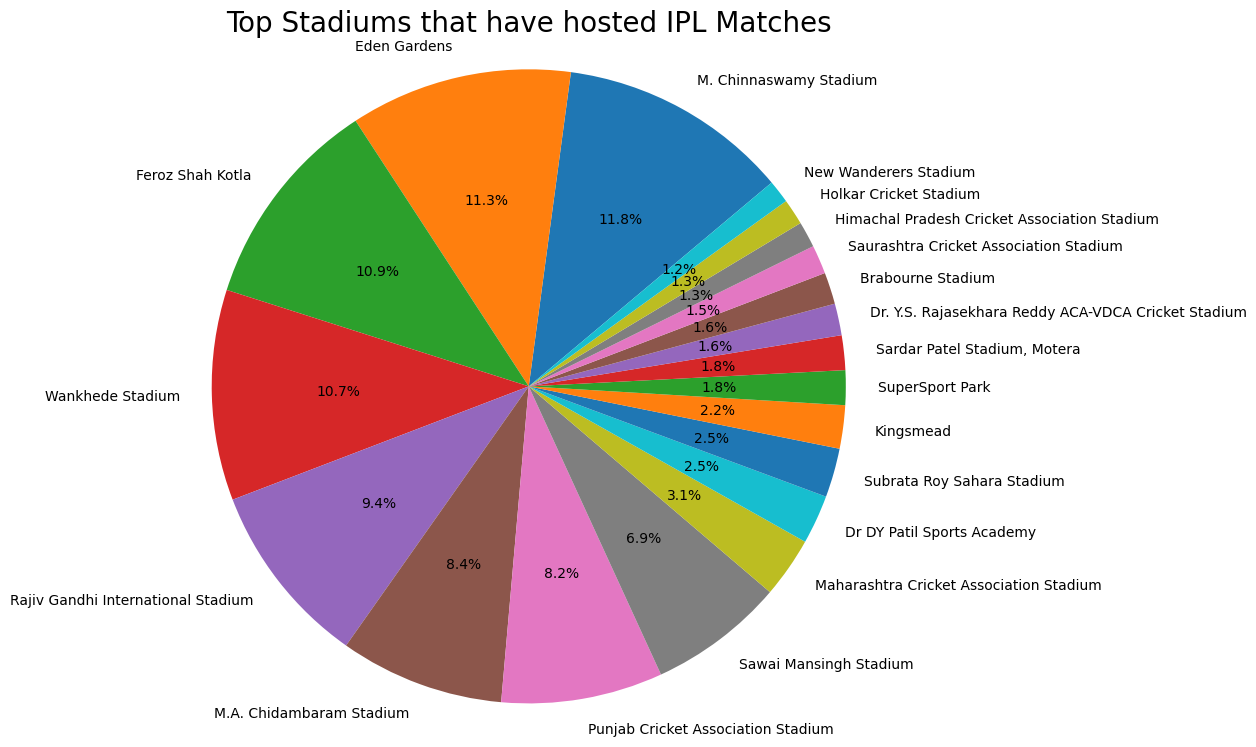

In [6]:
venue_counts=file2.groupby('venue').apply(lambda x:x['venue'].count()).reset_index(name='Match Counts')
top_venues_order=venue_counts.sort_values(by='Match Counts',ascending=False)
top_venues=top_venues_order[:20]
print('Top 20 Stadiums with the maximum number of Matches Played:\n',top_venues)
plt.figure(figsize=(9,9))
plt.pie(top_venues['Match Counts'],labels=top_venues['venue'],autopct='%1.1f%%', startangle=40)
plt.axis('equal')
plt.title('Top Stadiums that have hosted IPL Matches',size=20)

***Player Level Analysis***

**Top 10 Scoring Batsmen in Order**

In [7]:
batting_tot=file.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batting_sorted=batting_tot.sort_values(by='Runs',ascending=False)
top_batsmen=batting_sorted[:10]
print('The Top 10 Batsmen in thr Tournament are:\n',top_batsmen)
fig = px.bar(top_batsmen, x='batsman', y='Runs',
             hover_data=['batsman'], color='Runs',title='Top 10 Batsmen in IPL- Seasons 2008-2019')
fig.show()

The Top 10 Batsmen in thr Tournament are:
         batsman    Runs
359    SK Raina  3793.0
131   G Gambhir  3419.0
309   RG Sharma  3334.0
326  RV Uthappa  3064.0
83     CH Gayle  3029.0
249    MS Dhoni  2987.0
414     V Kohli  2958.0
333    S Dhawan  2733.0
100   DA Warner  2657.0
416    V Sehwag  2629.0


**List of the Top 10 highest scorers in a match**

The Top 10 Batting Performances in the IPL History are:
          batsman  Innings Runs  Balls Faced  Strike Rate for Match  inning  \
0       CH Gayle         175.0           69             253.623188       1   
69   BB McCullum         158.0           77             205.194805       1   
146     CH Gayle         128.0           62             206.451613       1   
208      M Vijay         127.0           57             222.807018       1   
265    DA Warner         126.0           60             210.000000       1   
325     V Sehwag         122.0           62             196.774194       1   
387  PC Valthaty         120.0           64             187.500000       2   
451     V Sehwag         119.0           58             205.172414       2   
509    A Symonds         117.0           57             205.263158       1   
566   MEK Hussey         116.0           54             214.814815       1   

                    batting_team                 bowling_team  
0    Royal Challenge

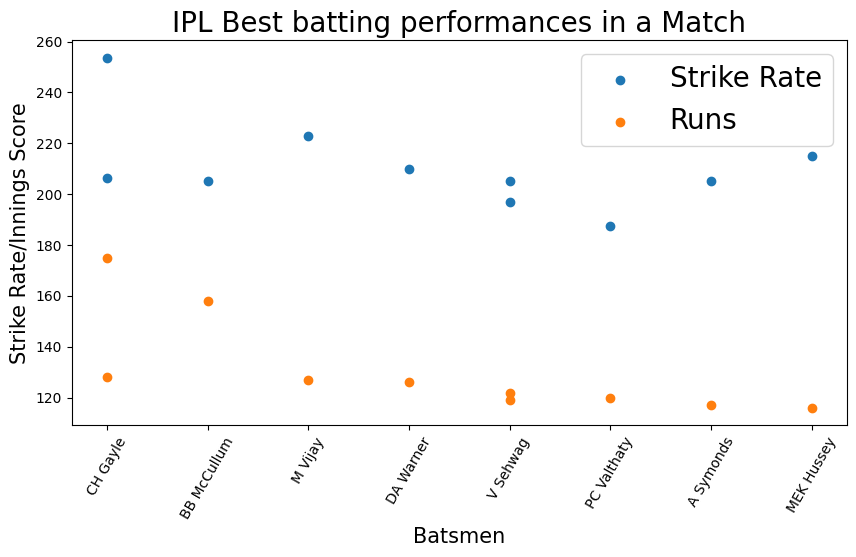

In [8]:
batting_ings=file.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
batting_ings_sorted=batting_ings.sort_values(by='Innings Runs',ascending=False)
top_batsmen_scores=batting_ings_sorted[:10]
batsman_ball_faced=file.groupby(['match_id','batsman']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')
batsmen_performance=pd.merge(top_batsmen_scores,batsman_ball_faced,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_performance['Strike Rate for Match']=batsmen_performance['Innings Runs']*100/batsmen_performance['Balls Faced']
batsmen_innings=pd.merge(batsmen_performance,file,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_innings_req=batsmen_innings.iloc[:,1:8]
batsmen_innings_req_2=batsmen_innings_req.drop_duplicates()
print('The Top 10 Batting Performances in the IPL History are:\n',batsmen_innings_req_2)
x=batsmen_innings_req_2['batsman']
y1=batsmen_innings_req_2['Strike Rate for Match']
y2=batsmen_innings_req_2['Innings Runs']
plt.figure(figsize=(10,5))
plt.scatter(x,y1)
plt.scatter(x,y2)
plt.xlabel('Batsmen',size=15)
plt.ylabel('Strike Rate/Innings Score',size=15)
plt.title('IPL Best batting performances in a Match',size=20)
plt.xticks(rotation=60)
plt.legend(['Strike Rate','Runs'],prop={'size':20})


**The top 10 bowlers by wicket total are listed below.**

In [9]:
#Run Out is not considered as a wicket in the Bowler's account- hence we shall be removing them first
bowling_wickets=file[file['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10]
print('The Top Wicket Takers in the Tournament are:\n',top_bowlers)
fig = px.bar(top_bowlers, x='bowler', y='Wickets',
             hover_data=['bowler'], color='Wickets',title='Top 10 Bowlers in IPL- Seasons 2008-2019')
fig.show()


The Top Wicket Takers in the Tournament are:
               bowler  Wickets
243       SL Malinga      130
5           A Mishra      113
190        PP Chawla      104
100  Harbhajan Singh      101
205    R Vinay Kumar       93
191          PP Ojha       89
90          DW Steyn       89
213         RP Singh       87
294           Z Khan       86
76          DJ Bravo       83


**List of the Top 10 IPL wicket takers per game**

The Top 10 Batting Performances in the IPL History are:
               bowler  Wickets  Runs Conceeded  Runs per Wicket  inning  \
0      Sohail Tanvir        6            15.0              2.5       1   
24         SP Narine        5            20.0              4.0       1   
49        JD Unadkat        5            30.0              6.0       2   
73       JP Faulkner        5            20.0              4.0       1   
97          L Balaji        5            25.0              5.0       2   
122         I Sharma        5            13.0              2.6       2   
141  Harbhajan Singh        5            18.0              3.6       2   
166          B Kumar        5            20.0              4.0       2   
191         MM Patel        5            25.0              5.0       1   
215   AD Mascarenhas        5            29.0              5.8       1   

             batting_team            bowling_team  
0     Chennai Super Kings        Rajasthan Royals  
24        Kings XI Punja

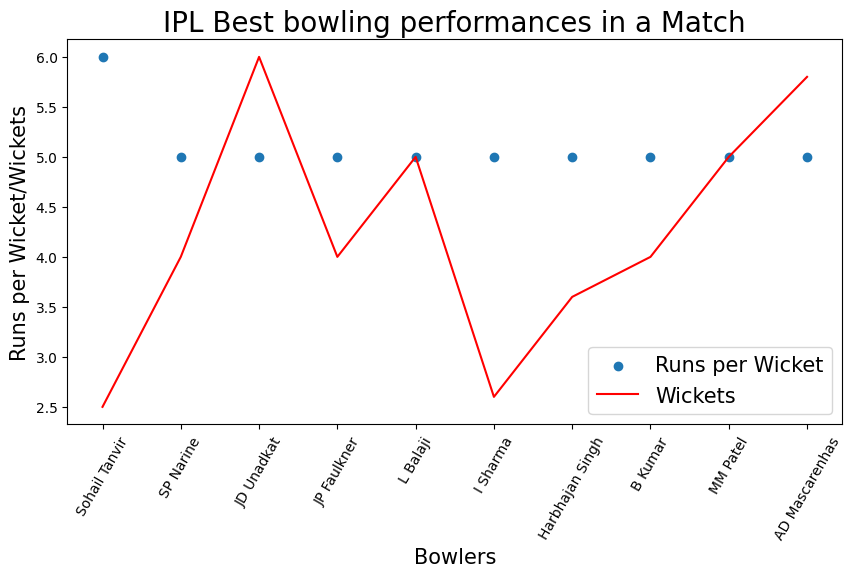

In [10]:
#Run Out is not considered as a wicket in the Bowler's account- hence we shall be removing them first
match_bowling_tot=bowling_wickets.groupby(['match_id','bowler']).apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
match_bowling_wick_count=match_bowling_tot.groupby(['match_id','bowler']).count().reset_index()
match_bowling_top=match_bowling_wick_count.sort_values(by='Wickets',ascending=False)
match_top_bowlers=match_bowling_top.loc[:,['match_id','bowler','Wickets']][0:10]
match_bowling_runs=file.groupby(['match_id','bowler']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
match_bowler_performance=pd.merge(match_top_bowlers,match_bowling_runs,how='inner',left_on=['match_id','bowler'],right_on=['match_id','bowler'])
match_bowler_performance['Runs per Wicket']=match_bowler_performance['Runs Conceeded']/match_bowler_performance['Wickets']
bowler_innings=pd.merge(match_bowler_performance,file,how='inner',left_on=['match_id','bowler'],right_on=['match_id','bowler'])
bowler_innings_req=bowler_innings.iloc[:,1:8]
bowler_innings_req_2=bowler_innings_req.drop_duplicates()
print('The Top 10 Batting Performances in the IPL History are:\n',bowler_innings_req_2)
x=bowler_innings_req_2['bowler']
y1=bowler_innings_req_2['Wickets']
y2=bowler_innings_req_2['Runs per Wicket']
plt.figure(figsize=(10,5))
plt.scatter(x,y1)
plt.plot(x,y2,'r')
plt.xlabel('Bowlers',size=15)
plt.ylabel('Runs per Wicket/Wickets',size=15)
plt.title('IPL Best bowling performances in a Match',size=20)
plt.xticks(rotation=60)
plt.legend(['Runs per Wicket','Wickets'],prop={'size':15})

Top 10 fielders, including Wicket Keepers

In [11]:
#Creating a list of the best fielders- Considering Catch,Run Out and Stumpings
fielder_list=file.groupby('fielder').apply(lambda x:x).dropna().reset_index()
fielder_list_count=fielder_list.groupby('fielder').count()
fielder_list_counts=fielder_list_count['dismissal_kind'].reset_index(name='Dismissals')
fielder_list_max=fielder_list_counts.sort_values(by='Dismissals',ascending=False)
top_fielders=fielder_list_max[0:10]
print('The Best Fielders(and WicketKeepers) in the Torunament are:\n',top_fielders)

fig = px.bar(top_fielders, x='fielder', y='Dismissals',
             hover_data=['fielder'], color='Dismissals',title='Top 10 Fielders in IPL- Seasons 2008-2019')
fig.show()

The Best Fielders(and WicketKeepers) in the Torunament are:
             fielder  Dismissals
236        MS Dhoni         102
173      KD Karthik          92
314      RV Uthappa          92
342        SK Raina          80
20     AC Gilchrist          75
17   AB de Villiers          73
298       RG Sharma          70
263        PA Patel          62
396         V Kohli          60
168      KA Pollard          59


<ipython-input-11-66bdda64b63c>:2: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)




**Figuring the batsman's strike rate when he or she has scored more runs than or equal to a target run (the target run variable can be adjusted according to the situation; we have assumed a minimum run total of 1000).**

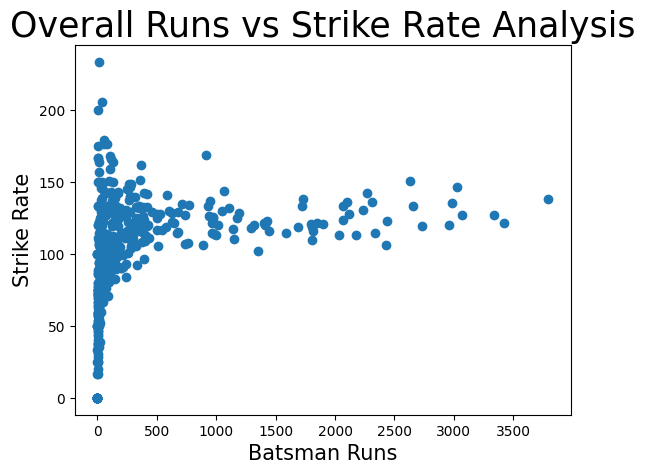

The Top 10 batsmen having highest strike rate, scoring atleast 1000 Runs:
             batsman    Runs  Strike Rate
416        V Sehwag  2629.0   150.659026
83         CH Gayle  3029.0   146.257846
99        DA Miller  1068.0   143.548387
437       YK Pathan  2266.0   142.247332
182      KA Pollard  1727.0   138.381410
359        SK Raina  3793.0   138.027656
22   AB de Villiers  2314.0   136.277974
374       SR Watson  2102.0   136.139896
249        MS Dhoni  2987.0   135.342093
121        DR Smith  1723.0   133.153014


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'V Sehwag'),
  Text(1, 0, 'CH Gayle'),
  Text(2, 0, 'DA Miller'),
  Text(3, 0, 'YK Pathan'),
  Text(4, 0, 'KA Pollard'),
  Text(5, 0, 'SK Raina'),
  Text(6, 0, 'AB de Villiers'),
  Text(7, 0, 'SR Watson'),
  Text(8, 0, 'MS Dhoni'),
  Text(9, 0, 'DR Smith')])

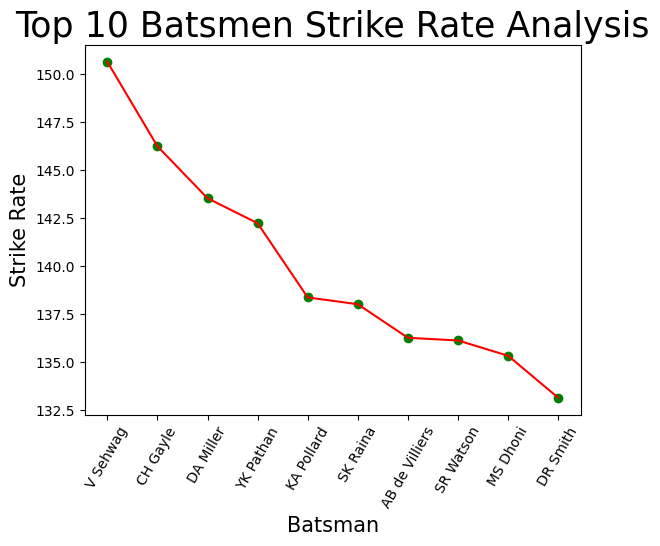

In [12]:
Target_run=1000
batting_tot=file.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batsman_balls_faced=file.groupby('batsman').count()
batsman_balls_faced_count=batsman_balls_faced['ball'].reset_index(name='Balls Faced')
batsman_runs_balls=pd.merge(batting_tot,batsman_balls_faced_count,left_on='batsman',right_on='batsman',how='outer')
batsman_strike_rate=batsman_runs_balls.groupby(['batsman','Runs']).apply(lambda x:((x['Runs'])/(x['Balls Faced']))*100).reset_index(name='Strike Rate')
plt.scatter(batsman_strike_rate['Runs'],batsman_strike_rate['Strike Rate'])
plt.plot(np.mean(batsman_strike_rate['Strike Rate']),'r')
plt.xlabel('Batsman Runs',size=15)
plt.ylabel('Strike Rate',size=15)
plt.title('Overall Runs vs Strike Rate Analysis',size=25)
plt.show()
batsman_strike_rate_list=batsman_strike_rate.sort_values(by='Strike Rate',ascending=False)
batsman_strike_rate_above_target_runs=batsman_strike_rate_list[batsman_strike_rate_list['Runs']>=Target_run]
top_strike_rate_batsman=batsman_strike_rate_above_target_runs.loc[:,['batsman','Runs','Strike Rate']][0:10]
print('The Top 10 batsmen having highest strike rate, scoring atleast {} Runs:\n'.format(Target_run),top_strike_rate_batsman)
plt.plot(top_strike_rate_batsman['batsman'],top_strike_rate_batsman['Strike Rate'],color='r')
plt.scatter(top_strike_rate_batsman['batsman'],top_strike_rate_batsman['Strike Rate'],color='g')
plt.xlabel('Batsman',size=15)
plt.ylabel('Strike Rate',size=15)
plt.title('Top 10 Batsmen Strike Rate Analysis',size=25)
plt.xticks(rotation=60)


**Calculating the bowler's economy rate after they have bowled more balls than the entered ball limit (the ball limit variable is changeable, however we have assumed that the bowler has at least 1000 deliveries under his or her belt).**

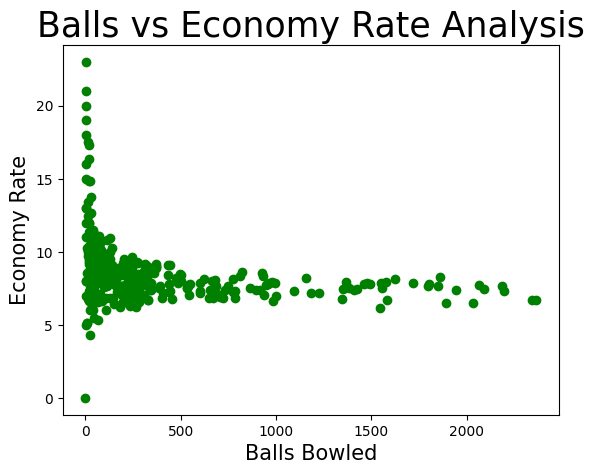

The Top 10 bowlers having best economy rate, bowling atleast 1000 balls:
               bowler  Balls Bowled  Economy Rate
288        SP Narine          1546      6.159120
101         DW Steyn          2030      6.464039
224         R Ashwin          1890      6.507937
283       SL Malinga          2341      6.686886
173   M Muralitharan          1581      6.698292
113  Harbhajan Singh          2364      6.703046
50           B Kumar          1344      6.803571
261         S Nadeem          1002      6.958084
282         SK Warne          1223      7.187244
170         M Kartik          1182      7.197970


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'SP Narine'),
  Text(1, 0, 'DW Steyn'),
  Text(2, 0, 'R Ashwin'),
  Text(3, 0, 'SL Malinga'),
  Text(4, 0, 'M Muralitharan'),
  Text(5, 0, 'Harbhajan Singh'),
  Text(6, 0, 'B Kumar'),
  Text(7, 0, 'S Nadeem'),
  Text(8, 0, 'SK Warne'),
  Text(9, 0, 'M Kartik')])

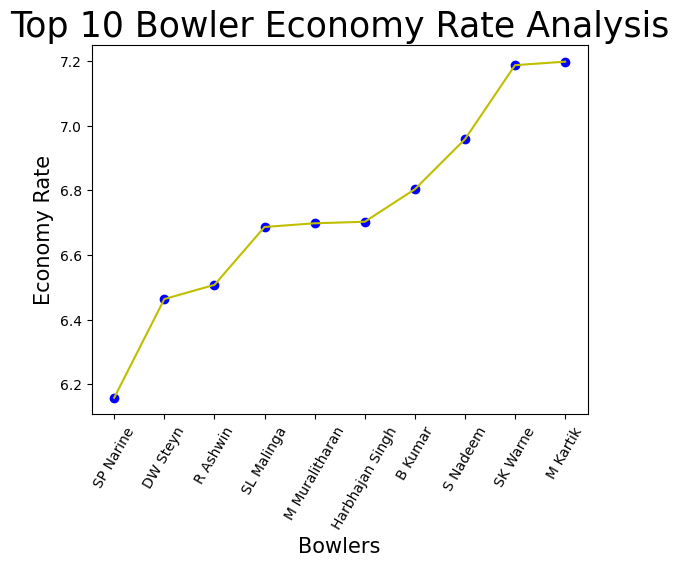

In [13]:
Ball_Limit=1000
bowling_runs=file.groupby('bowler').apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls=file.groupby('bowler').count()
bowled_balls=bowling_balls['ball'].reset_index(name='Balls Bowled')
bowler_stats=pd.merge(bowling_runs,bowled_balls,left_on='bowler',right_on='bowler',how='outer')
bowler_economy_rate=bowler_stats.groupby(['bowler','Balls Bowled']).apply(lambda x:(((x['Runs Conceeded'])/(x['Balls Bowled']))*6)).reset_index(name='Economy Rate')
plt.scatter(bowler_economy_rate['Balls Bowled'],bowler_economy_rate['Economy Rate'],color='g')
plt.xlabel('Balls Bowled',size=15)
plt.ylabel('Economy Rate',size=15)
plt.title('Balls vs Economy Rate Analysis',size=25)
plt.show()
bowler_best_economy_rate=bowler_economy_rate.sort_values(by='Economy Rate',ascending=True)
bowler_best_economy_rate_condition=bowler_best_economy_rate[bowler_best_economy_rate['Balls Bowled']>=Ball_Limit]
top_10_economy=bowler_best_economy_rate_condition.loc[:,['bowler','Balls Bowled','Economy Rate']][0:10]
print('The Top 10 bowlers having best economy rate, bowling atleast {} balls:\n'.format(Ball_Limit),top_10_economy)
plt.plot(top_10_economy['bowler'],top_10_economy['Economy Rate'],color='y')
plt.scatter(top_10_economy['bowler'],top_10_economy['Economy Rate'],color='b')
plt.xlabel('Bowlers',size=15)
plt.ylabel('Economy Rate',size=15)
plt.title('Top 10 Bowler Economy Rate Analysis',size=25)
plt.xticks(rotation=60)


**Creating a list of the Players who have achieved highest number of 'Man of the Match Awards'**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'CH Gayle'),
  Text(1, 0, 'AB de Villiers'),
  Text(2, 0, 'MS Dhoni'),
  Text(3, 0, 'DA Warner'),
  Text(4, 0, 'RG Sharma'),
  Text(5, 0, 'YK Pathan'),
  Text(6, 0, 'SR Watson'),
  Text(7, 0, 'SK Raina'),
  Text(8, 0, 'G Gambhir'),
  Text(9, 0, 'MEK Hussey'),
  Text(10, 0, 'V Kohli'),
  Text(11, 0, 'AM Rahane'),
  Text(12, 0, 'AD Russell'),
  Text(13, 0, 'DR Smith'),
  Text(14, 0, 'V Sehwag')])

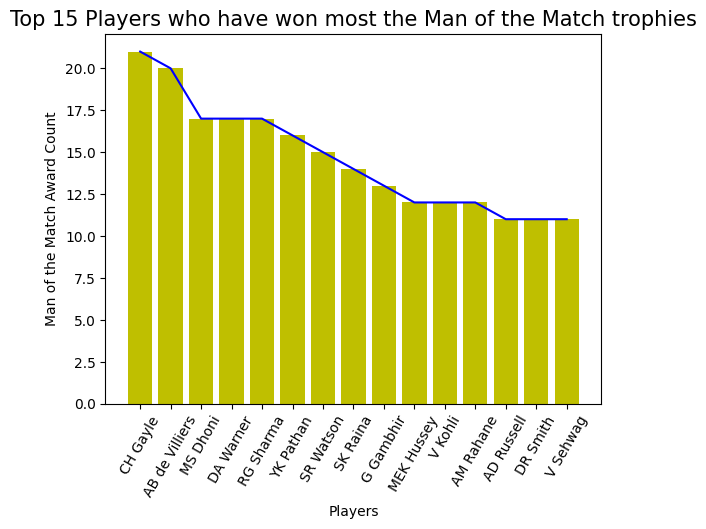

In [14]:
motm=file2.groupby('player_of_match').apply(lambda x:x['player_of_match'].count()).reset_index(name='Man of the Match Awards')
motm_sort=motm.sort_values(by='Man of the Match Awards',ascending=False)
motm_top=motm_sort[0:15]
plt.plot(motm_top['player_of_match'],motm_top['Man of the Match Awards'],color='b')
plt.bar(motm_top['player_of_match'],motm_top['Man of the Match Awards'],color='y')
plt.xlabel('Players')
plt.ylabel('Man of the Match Award Count')
plt.title('Top 15 Players who have won most the Man of the Match trophies',size=15)
plt.xticks(rotation=60)

**Best all-around performance, taking into account Batting, Bowling, and Fielding Factors.These characteristics can be changed based on the situation. listing the top ten**



We used the following metrics to determine the overall scores:

1. Batting Factor = 0.5, meaning that for every run scored, the
player's overall contribution will be equal to 0.5.
2. Bowling Factor = 15, so. The player's overall contribution will be 15 for each wicket taken.
3. Fielding Factor = 10, meaning that for each dismissal, the player's overall contribution will be 10


The top 10 best players overall are:
              batsman    Runs  Wickets  Dismissals  Overall Score
184         SK Raina  3793.0       23        80.0         3041.5
156        RG Sharma  3334.0       15        70.0         2592.0
85         JH Kallis  2427.0       65        33.0         2518.5
94        KA Pollard  1727.0       53        59.0         2248.5
54          DJ Bravo   969.0       83        46.0         2189.5
187       SL Malinga    82.0      130        18.0         2171.0
193        SR Watson  2102.0       60        21.0         2161.0
213          V Kohli  2958.0        4        60.0         2139.0
225        YK Pathan  2266.0       40        40.0         2133.0
71   Harbhajan Singh   590.0      101        32.0         2130.0


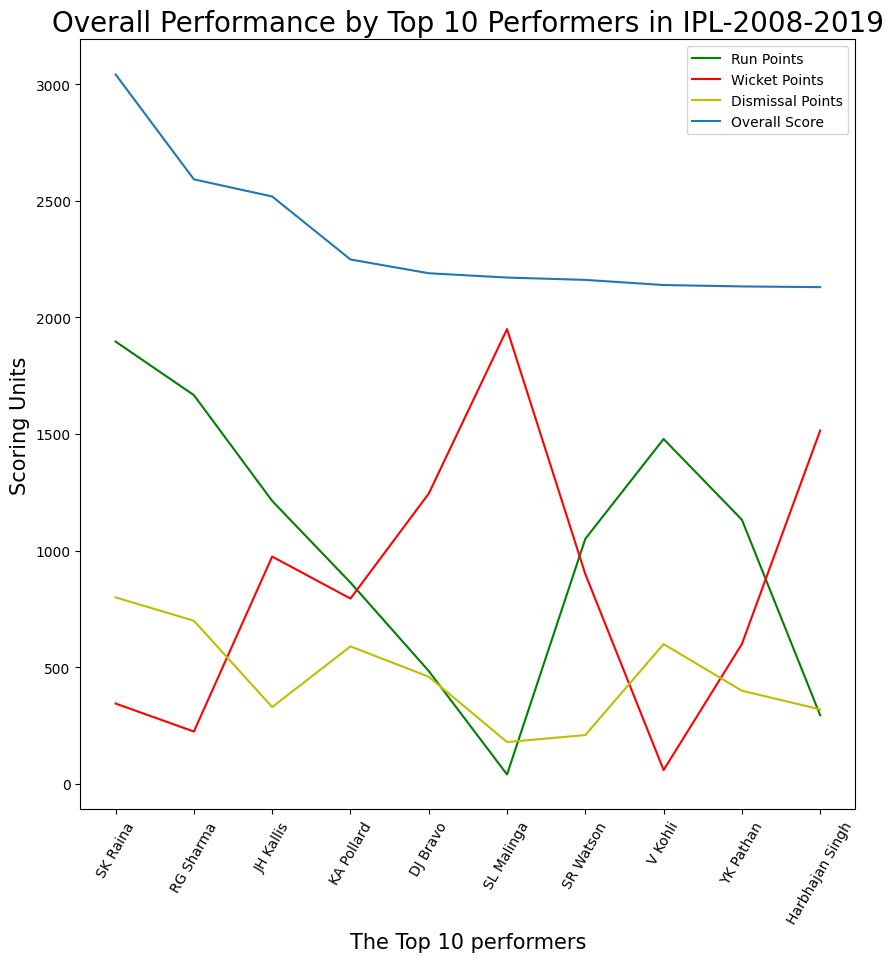

In [15]:
batting_factor=0.5
bowling_factor=15.0
fielding_factor=10.0
all_rounding_1=pd.merge(batting_sorted,bowling_top,left_on='batsman',right_on='bowler',how='inner')
all_rounding_2=pd.merge(all_rounding_1,fielder_list_max,left_on='batsman',right_on='fielder',how='left')
all_rounding_performance=all_rounding_2.groupby(['batsman','Runs','Wickets','Dismissals']).apply(lambda x:(((x['Runs'])*batting_factor)+((x['Wickets'])*bowling_factor)+((x['Dismissals'])*fielding_factor))).reset_index(name='Overall Score')
best_all_round_performance=all_rounding_performance.sort_values(by='Overall Score',ascending=False)
best_overall=best_all_round_performance.loc[:,['batsman','Runs','Wickets','Dismissals','Overall Score']][0:10]
print('The top 10 best players overall are:\n',best_overall)
plt.figure(figsize=(10,10))
plt.plot(best_overall['batsman'],best_overall['Runs']*batting_factor,'g')
plt.plot(best_overall['batsman'],best_overall['Wickets']*bowling_factor,'r')
plt.plot(best_overall['batsman'],best_overall['Dismissals']*fielding_factor,'y')
plt.plot(best_overall['batsman'],best_overall['Overall Score'])
plt.xlabel('The Top 10 performers',size=15)
plt.ylabel('Scoring Units',size=15)
plt.xticks(rotation=60)
plt.title('Overall Performance by Top 10 Performers in IPL-2008-2019',size=20)
plt.legend(['Run Points','Wicket Points','Dismissal Points','Overall Score'])

**Scores by Batsmen on a List Entered**

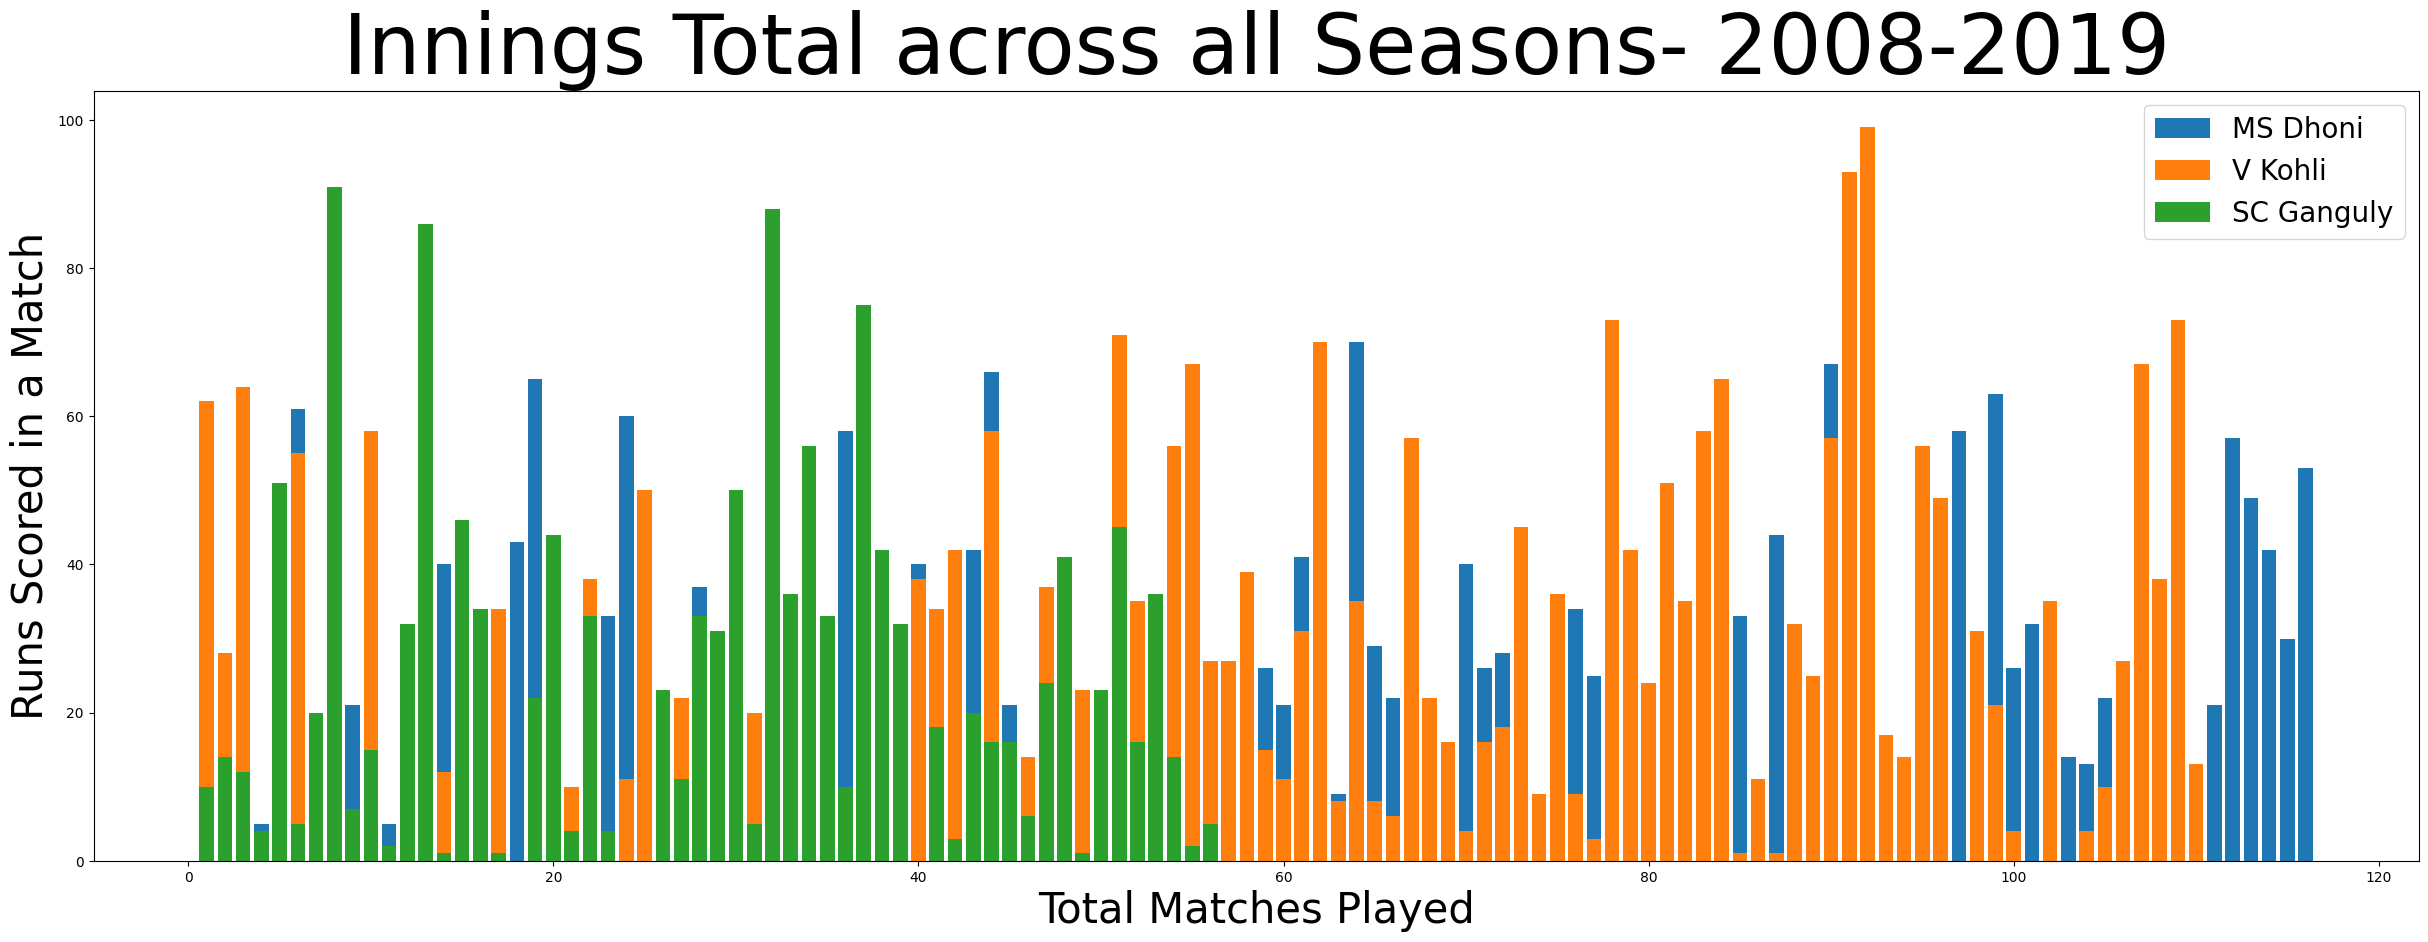

In [16]:
batsman_list_req=['MS Dhoni','V Kohli','SC Ganguly']
batsman=file[file.batsman.isin(batsman_list_req)]
batsman_run=batsman.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
#bat_list=batsman.batsman.unique()
plt.figure(figsize=(30,10))
for name in batsman_list_req:
    batsman_check=batsman_run[batsman_run.batsman==name]
    batsman_check.index = np.arange(1, len(batsman_check) + 1)
    x=batsman_check.index
    y=batsman_check.Runs
    plt.bar(x,y)
plt.legend(batsman_list_req,prop={'size':20})
plt.title("Innings Total across all Seasons- 2008-2019",fontsize=60)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("Runs Scored in a Match",fontsize=30)
plt.show()

**Performance of the batter against the opposition team, the score list for individual games and the economy rates of bowlers against the other team's batters.**


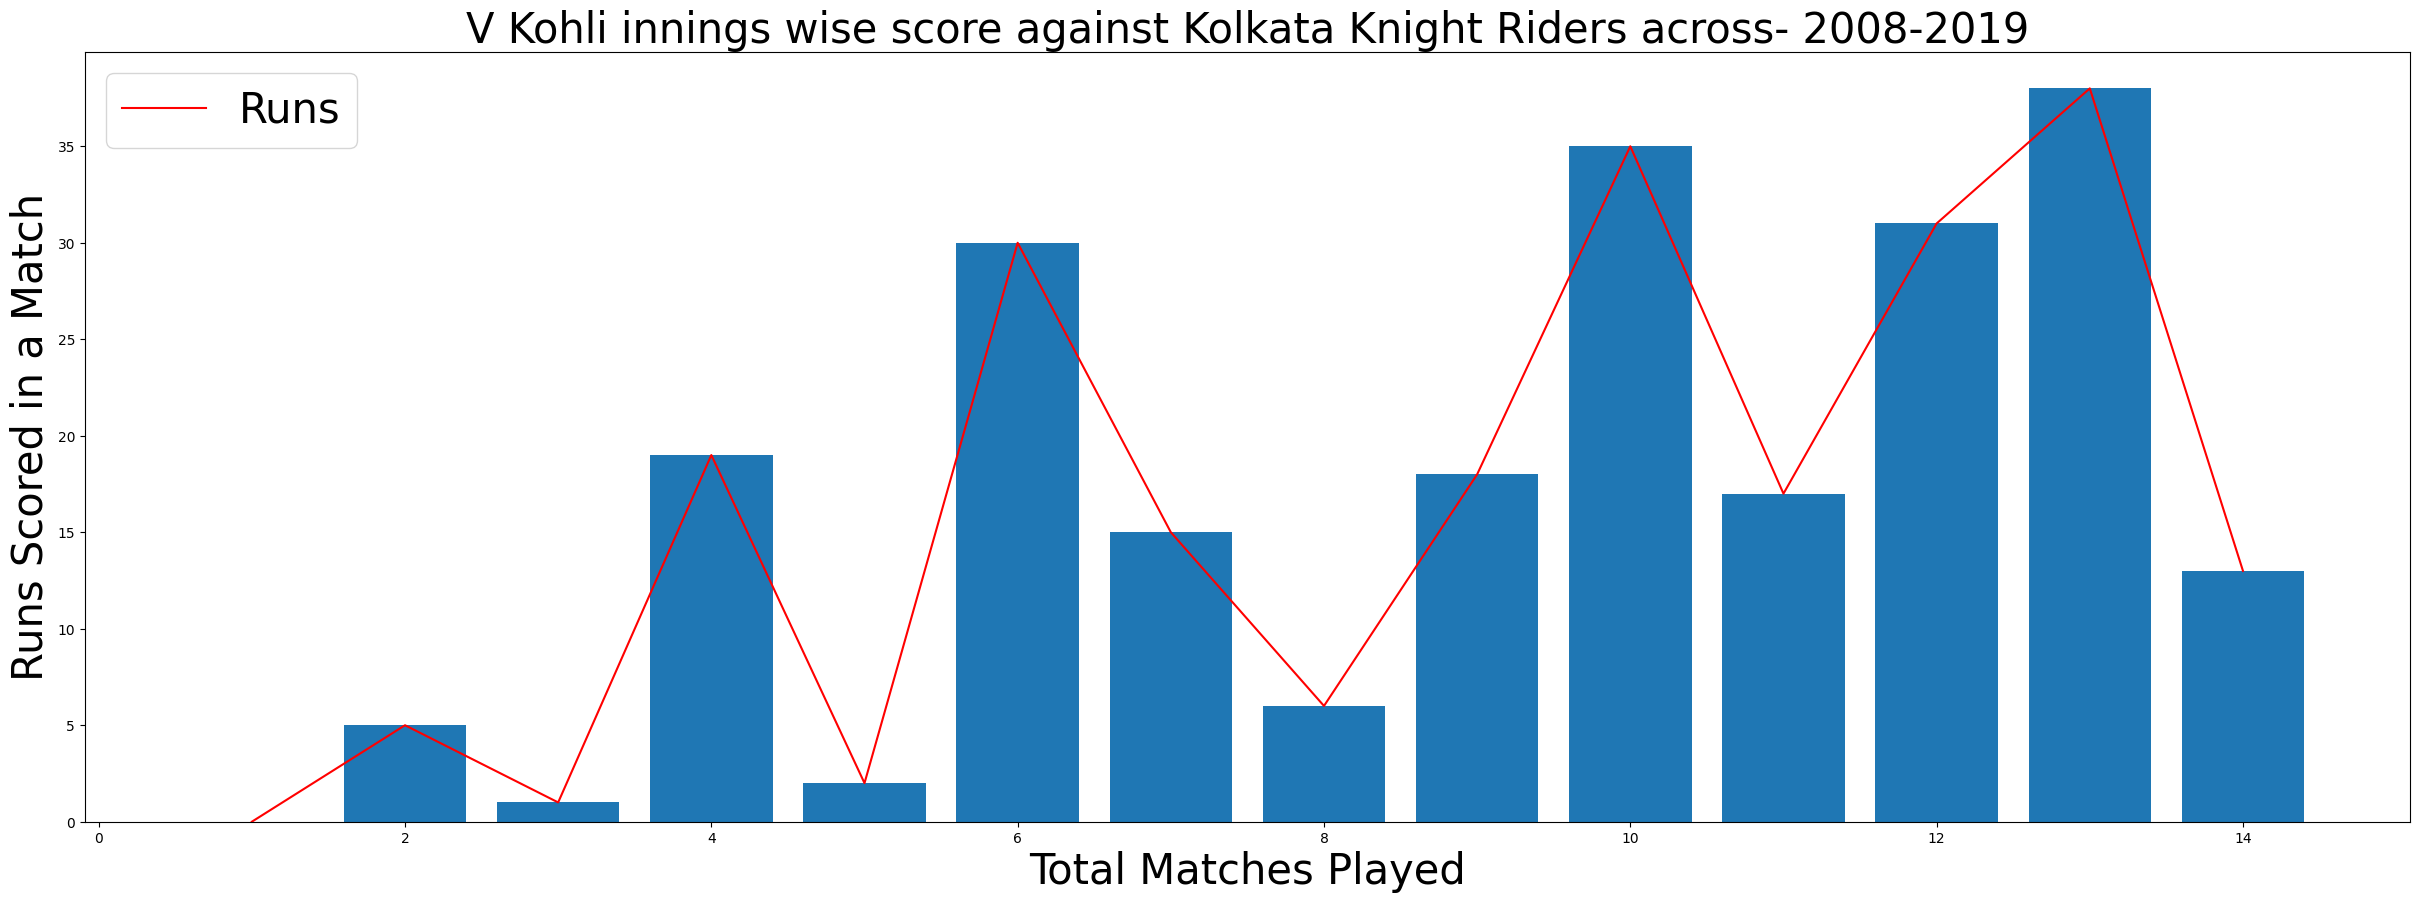

The runs scored in matches: 
 1      0.0
2      5.0
3      1.0
4     19.0
5      2.0
6     30.0
7     15.0
8      6.0
9     18.0
10    35.0
11    17.0
12    31.0
13    38.0
14    13.0
Name: Runs, dtype: float64
---------------------------------------------------------------------------------------------
The Economy rate of the various bowlers of Kolkata Knight Riders against the V Kohli (best to worst)
           bowler  Balls Bowled  Economy Rate
5      SP Narine            36      5.000000
2      JH Kallis            35      5.142857
1  Iqbal Abdulla            13      5.538462
4       M Morkel            15      6.000000
6       UT Yadav            17      6.000000
3       L Balaji            18      6.333333
0          B Lee            16      6.375000


In [17]:
batsman_list_req=['V Kohli']
opposition_team='Kolkata Knight Riders'
ball_limit=12
cond_1_1=file.batsman.isin(batsman_list_req)
cond_1_2=file.bowling_team==opposition_team
batsman_team=file[(cond_1_1) & (cond_1_2)]
batsman_team_run=batsman_team.groupby(['match_id','batsman','bowling_team']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
bowling_runs=batsman_team.groupby('bowler').apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls=batsman_team.groupby('bowler').count()
bowled_balls=bowling_balls['ball'].reset_index(name='Balls Bowled')
bowled_balls_limit=bowled_balls[bowled_balls['Balls Bowled']>=ball_limit]
bowler_stats=pd.merge(bowling_runs,bowled_balls_limit,left_on='bowler',right_on='bowler',how='inner')
bowler_economy_rate=bowler_stats.groupby(['bowler','Balls Bowled']).apply(lambda x:(((x['Runs Conceeded'])/(x['Balls Bowled']))*6)).reset_index(name='Economy Rate')
bowler_best_to_worst_1=bowler_economy_rate.sort_values(by='Economy Rate',ascending=True)
bowler_best_to_worst=bowler_best_to_worst_1.loc[:,['bowler','Balls Bowled','Economy Rate']]
plt.figure(figsize=(30,10))
batsman_team_run.index = np.arange(1, len(batsman_team_run) + 1)
x=batsman_team_run.index
y=batsman_team_run.Runs
plt.bar(x,y)
plt.plot(x,y,'r')
plt.title("{} innings wise score against {} across- 2008-2019".format(batsman_list_req[0],opposition_team),fontsize=30)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("Runs Scored in a Match",fontsize=30)
plt.legend(['Runs'],prop={'size':30})
plt.show()
print('The runs scored in matches: \n',y)
print('---------------------------------------------------------------------------------------------')
print('The Economy rate of the various bowlers of {} against the {} (best to worst)\n'.format(opposition_team,batsman_list_req[0]),bowler_best_to_worst)

***Team-specific Analysis***

**Innings wise batting average of the Teams**

Text(0.5, 1.0, 'Team wise Batting Average in IPL- Seasons 2008-2019')

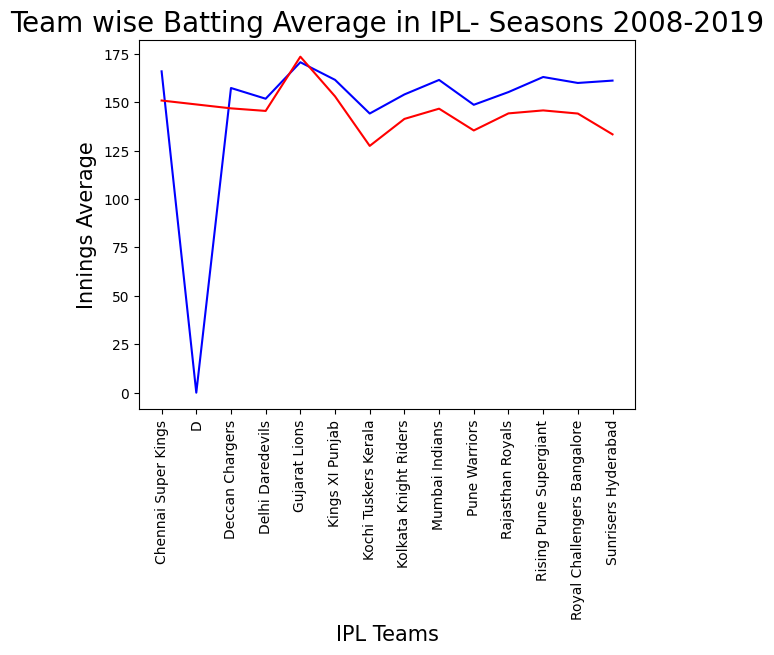

In [18]:
first_innins_run=file[file['inning']==1]
team_innings_run=first_innins_run.groupby(['batting_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_innings_avg=team_innings_run.groupby('batting_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_innings_avg['batting_team'],team_innings_avg['Innings Average'],'b')
second_innins_run=file[file['inning']==2]
team_innings_run=second_innins_run.groupby(['batting_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_innings_avg=team_innings_run.groupby('batting_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_innings_avg['batting_team'],team_innings_avg['Innings Average'],'r')
plt.xticks(rotation=90)
plt.xlabel('IPL Teams',size=15)
plt.ylabel('Innings Average',size=15)
plt.title('Team wise Batting Average in IPL- Seasons 2008-2019',size=20)


**Teams' innings-wise bowling average**

Text(0.5, 1.0, 'Team wise Bowling Average in IPL- Seasons 2008-2019')

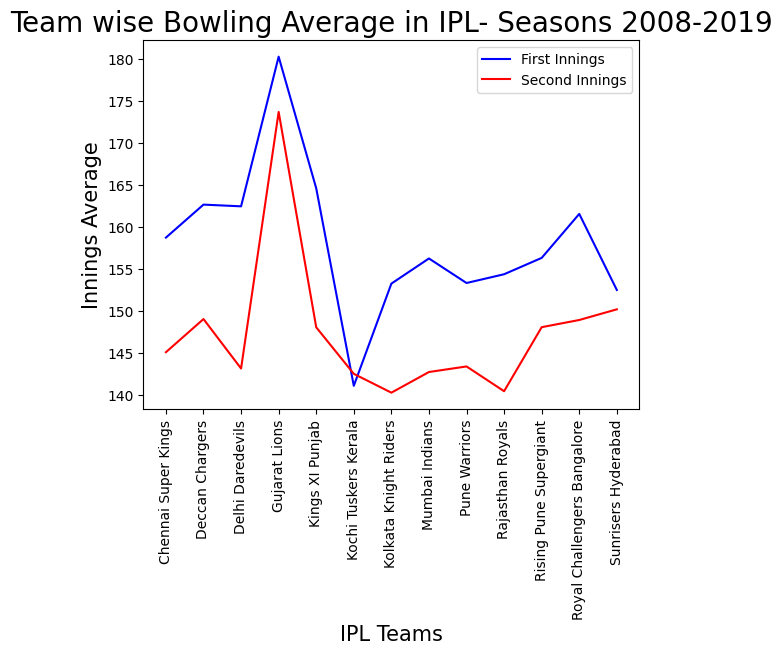

In [19]:
first_innins_score=file[file['inning']==1]
team_innings_score=first_innins_score.groupby(['bowling_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_innings_score_avg=team_innings_score.groupby('bowling_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_innings_score_avg['bowling_team'],team_innings_score_avg['Innings Average'],'b')
second_innins_score=file[file['inning']==2]
team_innings_second_score=second_innins_score.groupby(['bowling_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_second_innings_score_avg=team_innings_second_score.groupby('bowling_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_second_innings_score_avg['bowling_team'],team_second_innings_score_avg['Innings Average'],'r')
plt.xticks(rotation=90)
plt.legend(['First Innings','Second Innings'],prop={'size':10})
plt.xlabel('IPL Teams',size=15)
plt.ylabel('Innings Average',size=15)
plt.title('Team wise Bowling Average in IPL- Seasons 2008-2019',size=20)

**Team-wise Average: Win by Runs/Win by Wickets**

Text(0.5, 1.0, 'Teams Average winning by Runs/Wickets Summary')

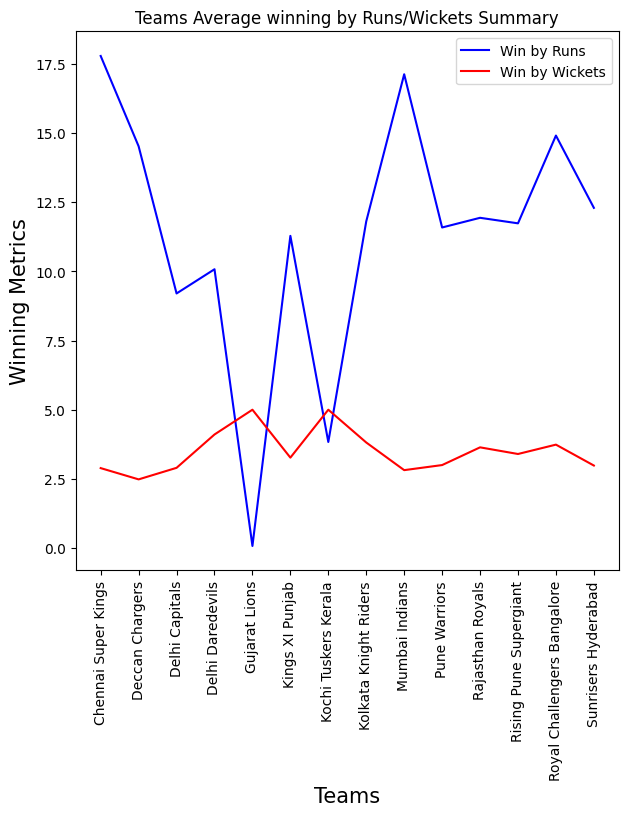

In [20]:
win_runs=file2.groupby('winner').apply(lambda x:np.average(x['win_by_runs'])).reset_index(name='Win By Runs Average')
win_wickets=file2.groupby('winner').apply(lambda x:np.average(x['win_by_wickets'])).reset_index(name='Win By Wickets Average')
plt.figure(figsize=(7,7))
plt.plot(win_runs['winner'],win_runs['Win By Runs Average'],color='b')
plt.plot(win_wickets['winner'],win_wickets['Win By Wickets Average'],color='r')
plt.xlabel('Teams',size=15)
plt.xticks(rotation=90)
plt.ylabel('Winning Metrics',size=15)
plt.legend(['Win by Runs','Win by Wickets'])
plt.title('Teams Average winning by Runs/Wickets Summary')

**Analysis of head-to-head games between IPL teams**

Text(33.2222222222222, 0.5, 'Match')

<Figure size 640x480 with 0 Axes>

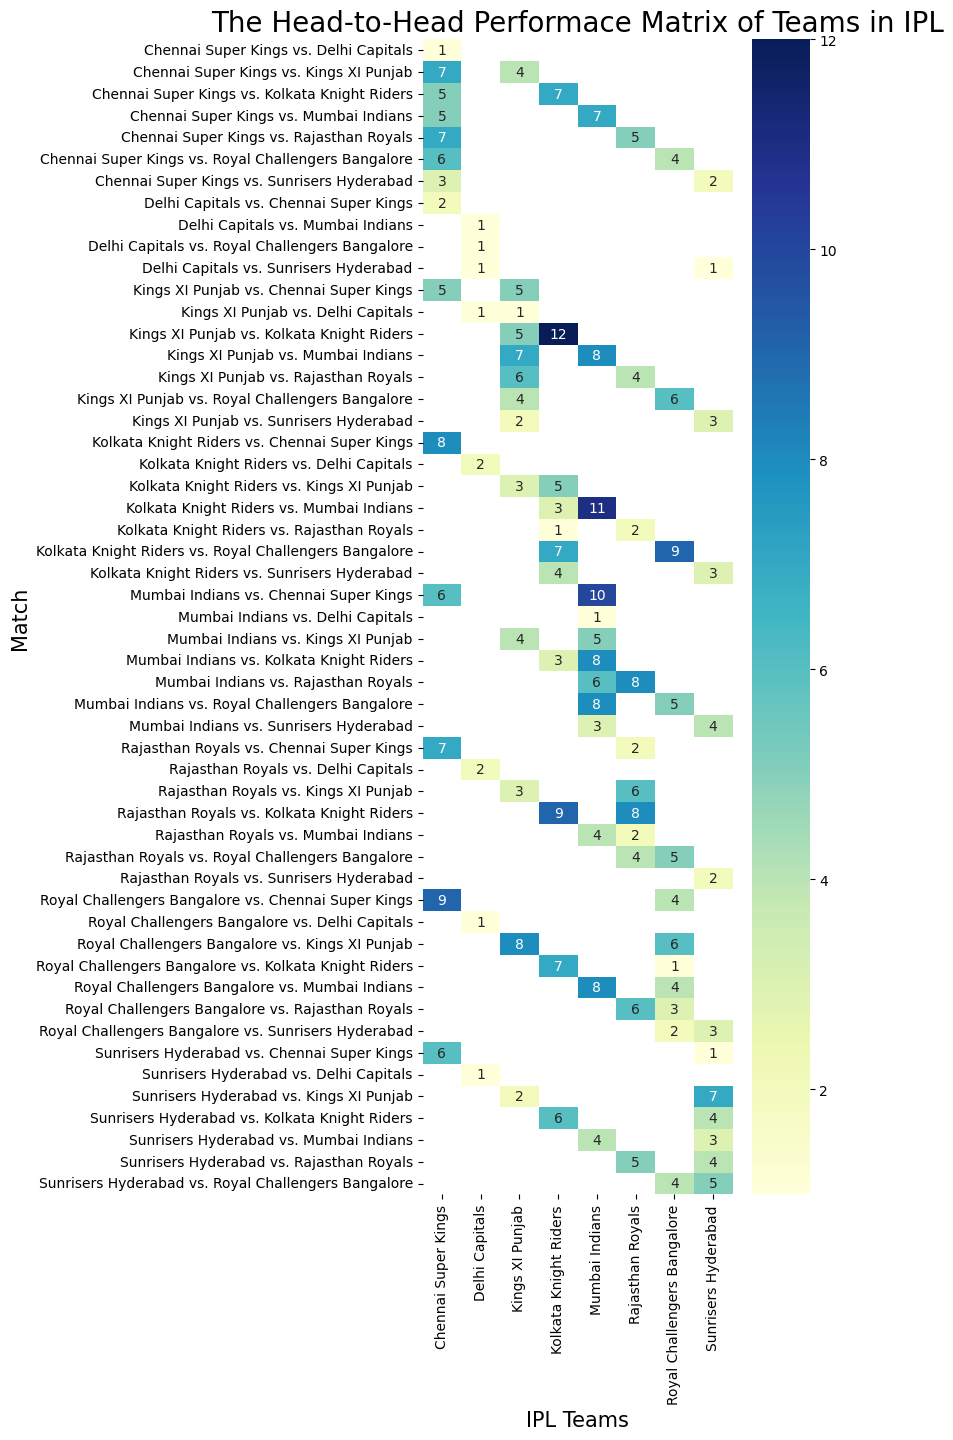

In [21]:
Current_teams=['Chennai Super Kings','Mumbai Indians','Rajasthan Royals','Delhi Capitals','Sunrisers Hyderabad','Kolkata Knight Riders','Royal Challengers Bangalore','Kings XI Punjab']
team_1_filter=file2[file2.team1.isin(Current_teams)]
team_2_filter=team_1_filter[team_1_filter.team2.isin(Current_teams)]
teams_filter=team_2_filter[team_2_filter.winner.isin(Current_teams)]
head_to_head_matches=teams_filter.groupby(['team1','team2','winner']).apply(lambda x:x['winner'].count()).reset_index(name='Winning Counts')
head_to_head_matches['Game']=head_to_head_matches['team1']+' vs. '+head_to_head_matches['team2']
head_to_head_matches.loc[:,['Game','winner','Winning Counts']]
heatmap1_data = pd.pivot_table(head_to_head_matches, values='Winning Counts',
                     index=['Game'],
                     columns='winner')
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(5,15))
g=sns.heatmap(heatmap1_data,annot=True, cmap="YlGnBu",fmt='g')
ax.set_title('The Head-to-Head Performace Matrix of Teams in IPL',size=20)
ax.set_xlabel('IPL Teams',size=15)
ax.set_ylabel('Match',size=15)

**Team wise winning Performance at Venues**

Text(0.5, 1.0, 'Team wise wins at the Venues')

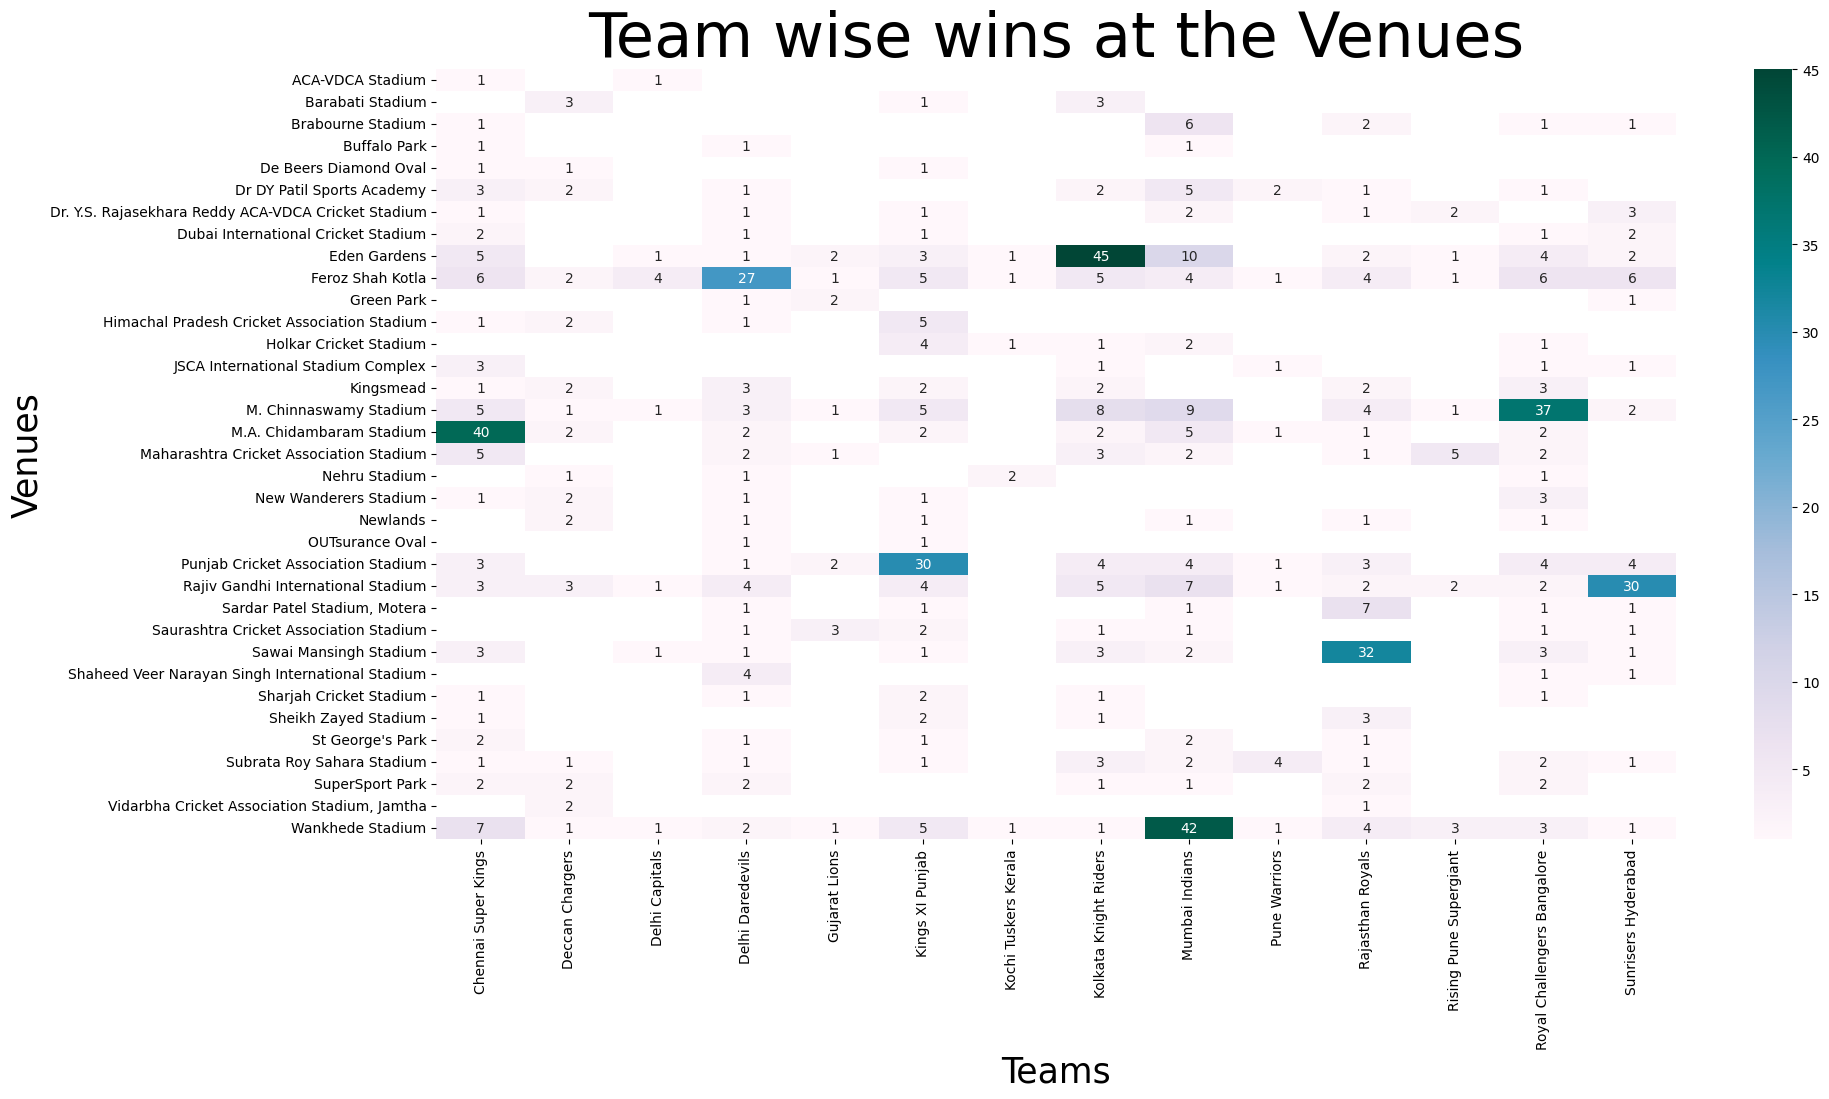

In [22]:
venue_win=file2.groupby(['venue','winner']).apply(lambda x:x['winner'].count()).reset_index(name='Match Wins')
venue_win_pvt=pd.pivot(venue_win,values='Match Wins',index='venue',columns='winner')
venue_win_pvt.replace(np.NaN,0)
plt.figure(figsize=(20,10))
htmp=sns.heatmap(venue_win_pvt,annot=True,fmt='g',cmap='PuBuGn')
plt.xlabel('Teams',size=25)
plt.ylabel('Venues',size=25)
plt.title('Team wise wins at the Venues',size=45)

**Location wise Best Performers**

Text(0.5, 1.0, 'Players with the Best Performance at Venues')

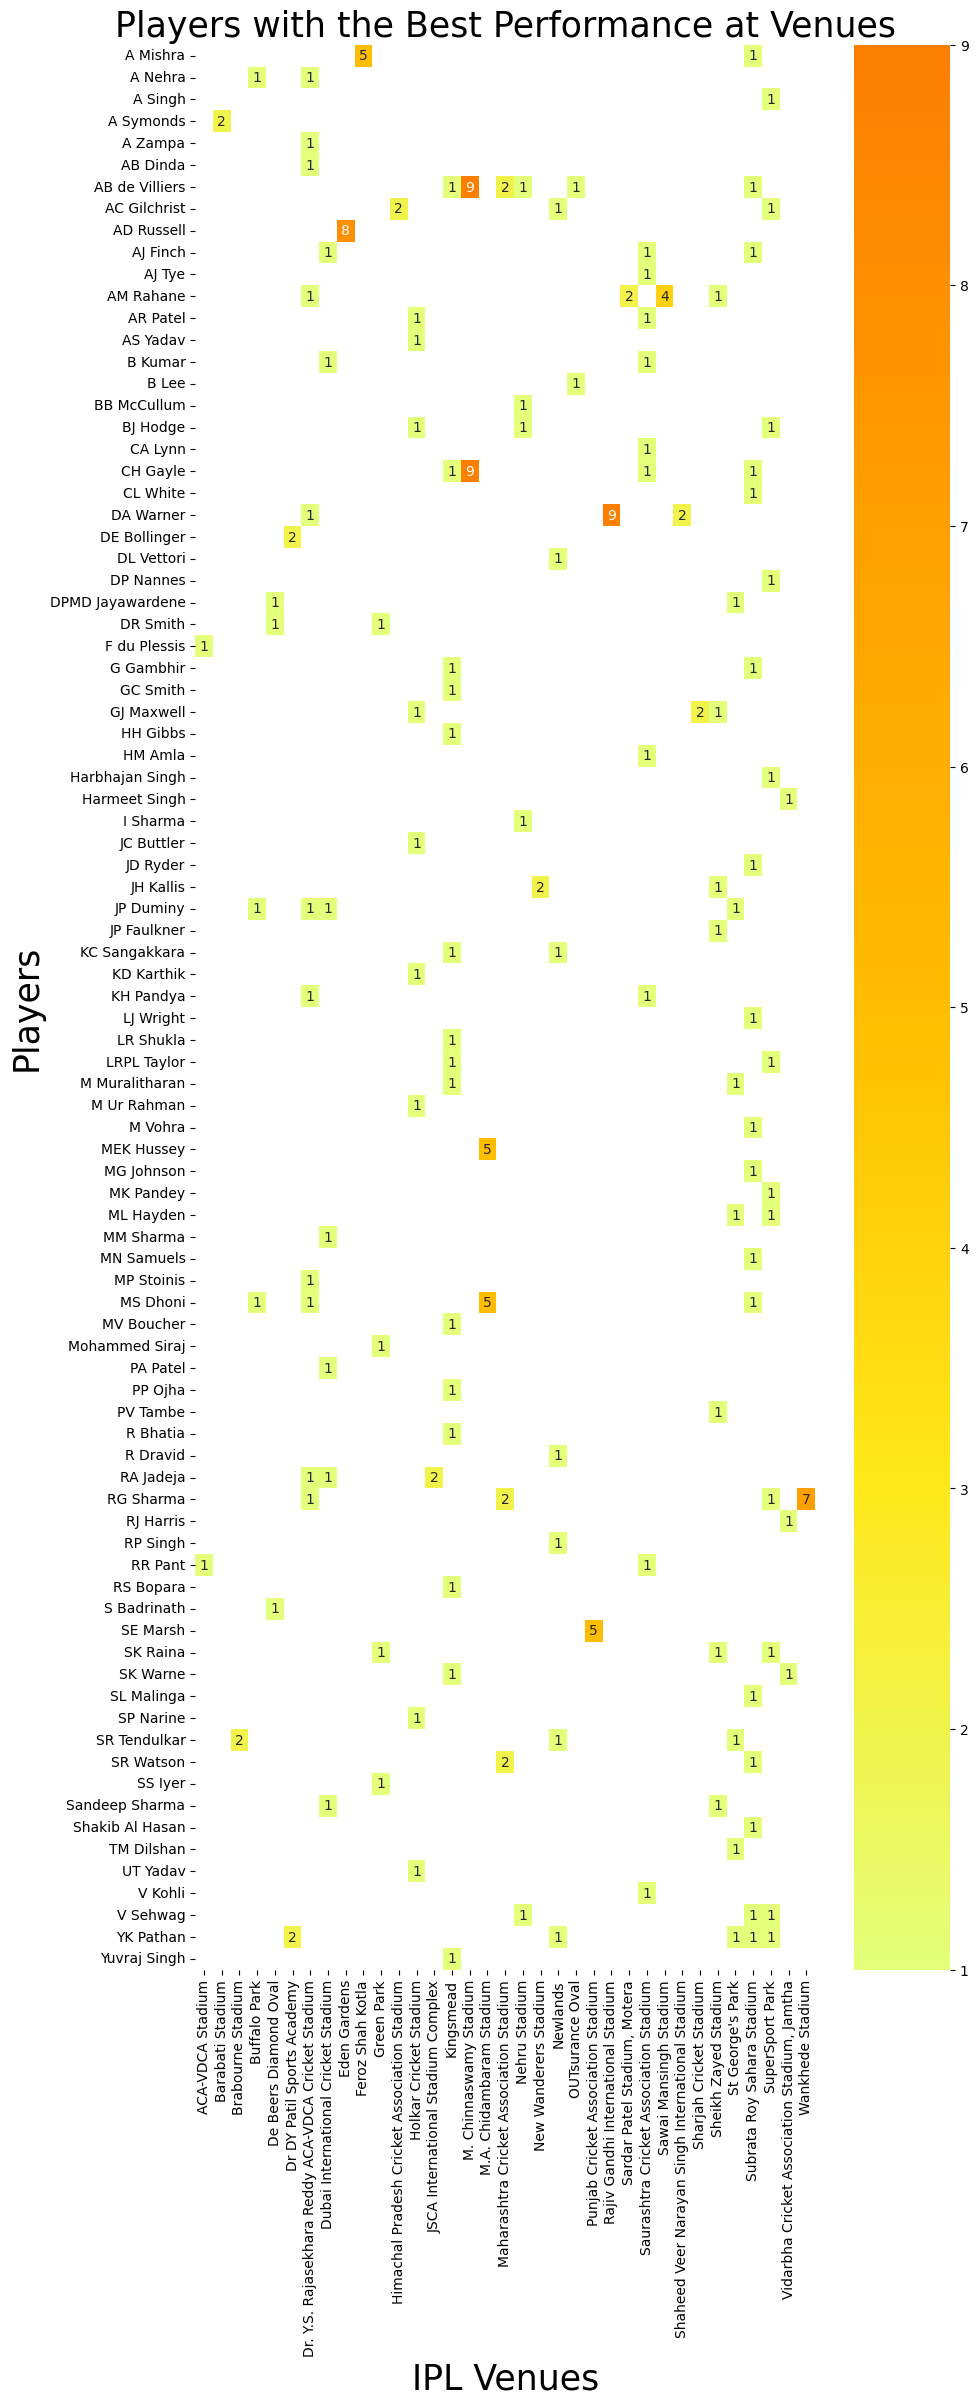

In [23]:
venue_mom=file2.groupby(['venue','player_of_match']).apply(lambda x:x['player_of_match'].count()).reset_index(name='MoM_Winner')
venue_mom_sort=venue_mom.sort_values(by=['venue','MoM_Winner'],ascending=[True,False])
venue_mom_count_max=venue_mom_sort.groupby(['venue']).apply(lambda x:np.max(x['MoM_Winner'])).reset_index(name='MoM_Winner')
venue_best=pd.merge(venue_mom,venue_mom_count_max,how='inner',left_on=['venue','MoM_Winner'],right_on=['venue','MoM_Winner'])
venue_best_multiple_pivot=pd.pivot(venue_best,values='MoM_Winner',index='player_of_match',columns='venue')
plt.figure(figsize=(10,25))
sns.heatmap(venue_best_multiple_pivot,annot=True,fmt='g',cmap='Wistia')
plt.xlabel('IPL Venues',size=25)
plt.ylabel('Players',size=25)
plt.title('Players with the Best Performance at Venues',size=25)

**Venue Heatmap's Toss Decisions in the IPL**

Text(0.5, 1.0, 'The Toss Decisions taken by Venue Heatmap-in IPL')

<Figure size 640x480 with 0 Axes>

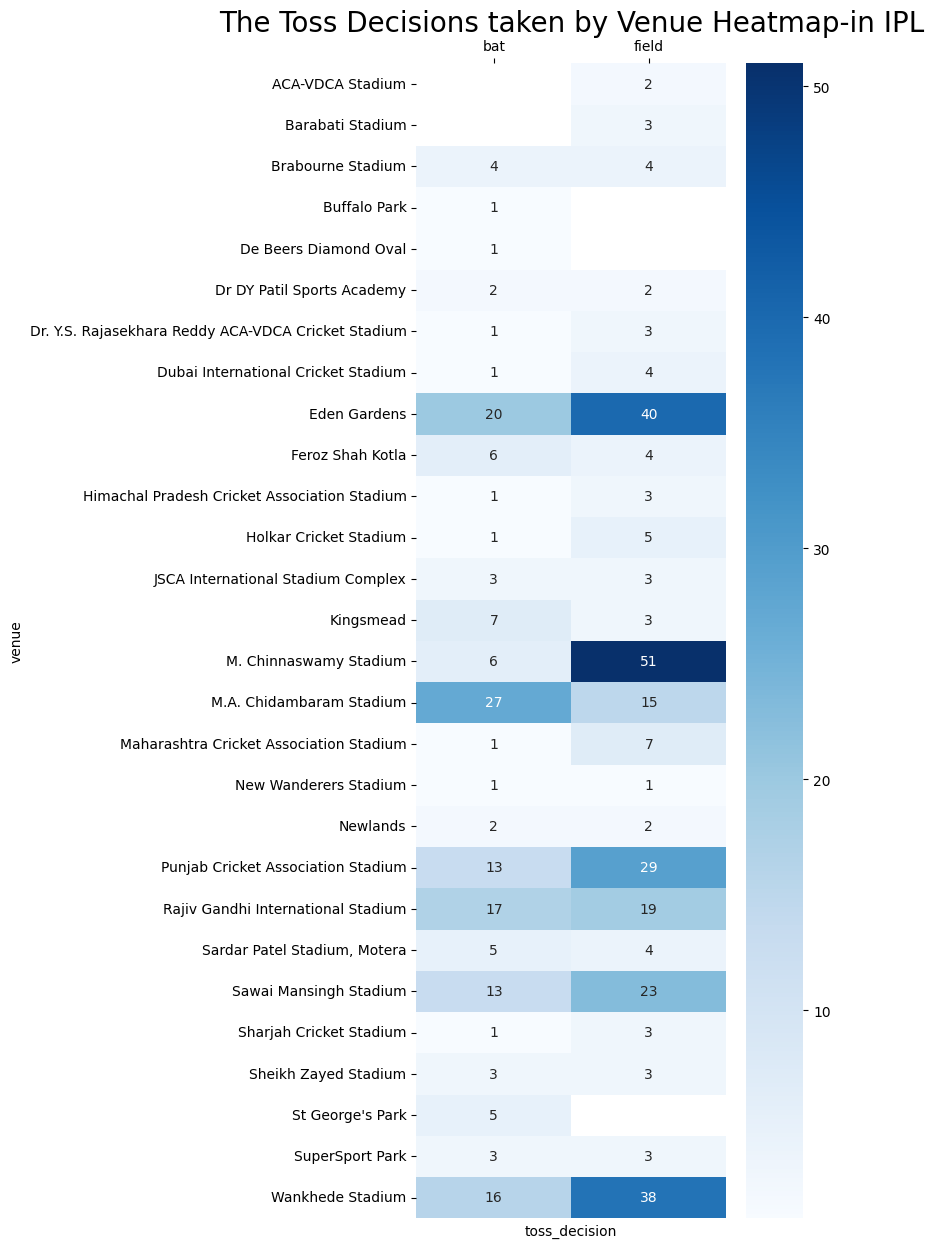

In [24]:
venue_toss=teams_filter.groupby(['venue','toss_decision']).apply(lambda x:x['toss_decision'].count()).reset_index(name='Toss Decision Counts')
heatmap2_data = pd.pivot_table(venue_toss, values='Toss Decision Counts',
                     index=['venue'],
                     columns='toss_decision')
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(5,15))
g=sns.heatmap(heatmap2_data,annot=True, cmap="Blues",fmt='g')
g.xaxis.set_ticks_position("top")
ax.set_title('The Toss Decisions taken by Venue Heatmap-in IPL',size=20)


**Analysing the Toss's Impact, The Team Winning the Toss Winning/Losing the Match Analysis of the Venue and Decision Level**

In [25]:
venue_toss_result=teams_filter.groupby(['venue','toss_decision']).apply(lambda x:np.sum(np.where(x['toss_winner']==x['winner'],1,0))).reset_index(name='Toss Winner Wins Match')
merged_venue_data=pd.merge(venue_toss_result,venue_toss,how='inner',left_on=['venue','toss_decision'],right_on=['venue','toss_decision'])
merged_venue_data['Toss Winner Lose Match']=merged_venue_data['Toss Decision Counts']-merged_venue_data['Toss Winner Wins Match']
merged_data_arranged=merged_venue_data.loc[:,['venue','toss_decision','Toss Decision Counts','Toss Winner Wins Match','Toss Winner Lose Match']]
merged_data_arranged

,venue,toss_decision,Toss Decision Counts,Toss Winner Wins Match,Toss Winner Lose Match
0,ACA-VDCA Stadium,field,2,2,0
1,Barabati Stadium,field,3,2,1
2,Brabourne Stadium,bat,4,2,2
3,Brabourne Stadium,field,4,3,1
4,Buffalo Park,bat,1,1,0
5,De Beers Diamond Oval,bat,1,0,1
6,Dr DY Patil Sports Academy,bat,2,2,0
7,Dr DY Patil Sports Academy,field,2,2,0
8,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,bat,1,0,1
9,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,field,3,1,2


**The Win/Loss Analysis by Venue and Toss Decision is visualised using a heatmap.**


Text(70.72222222222219, 0.5, 'Stadium')

<Figure size 640x480 with 0 Axes>

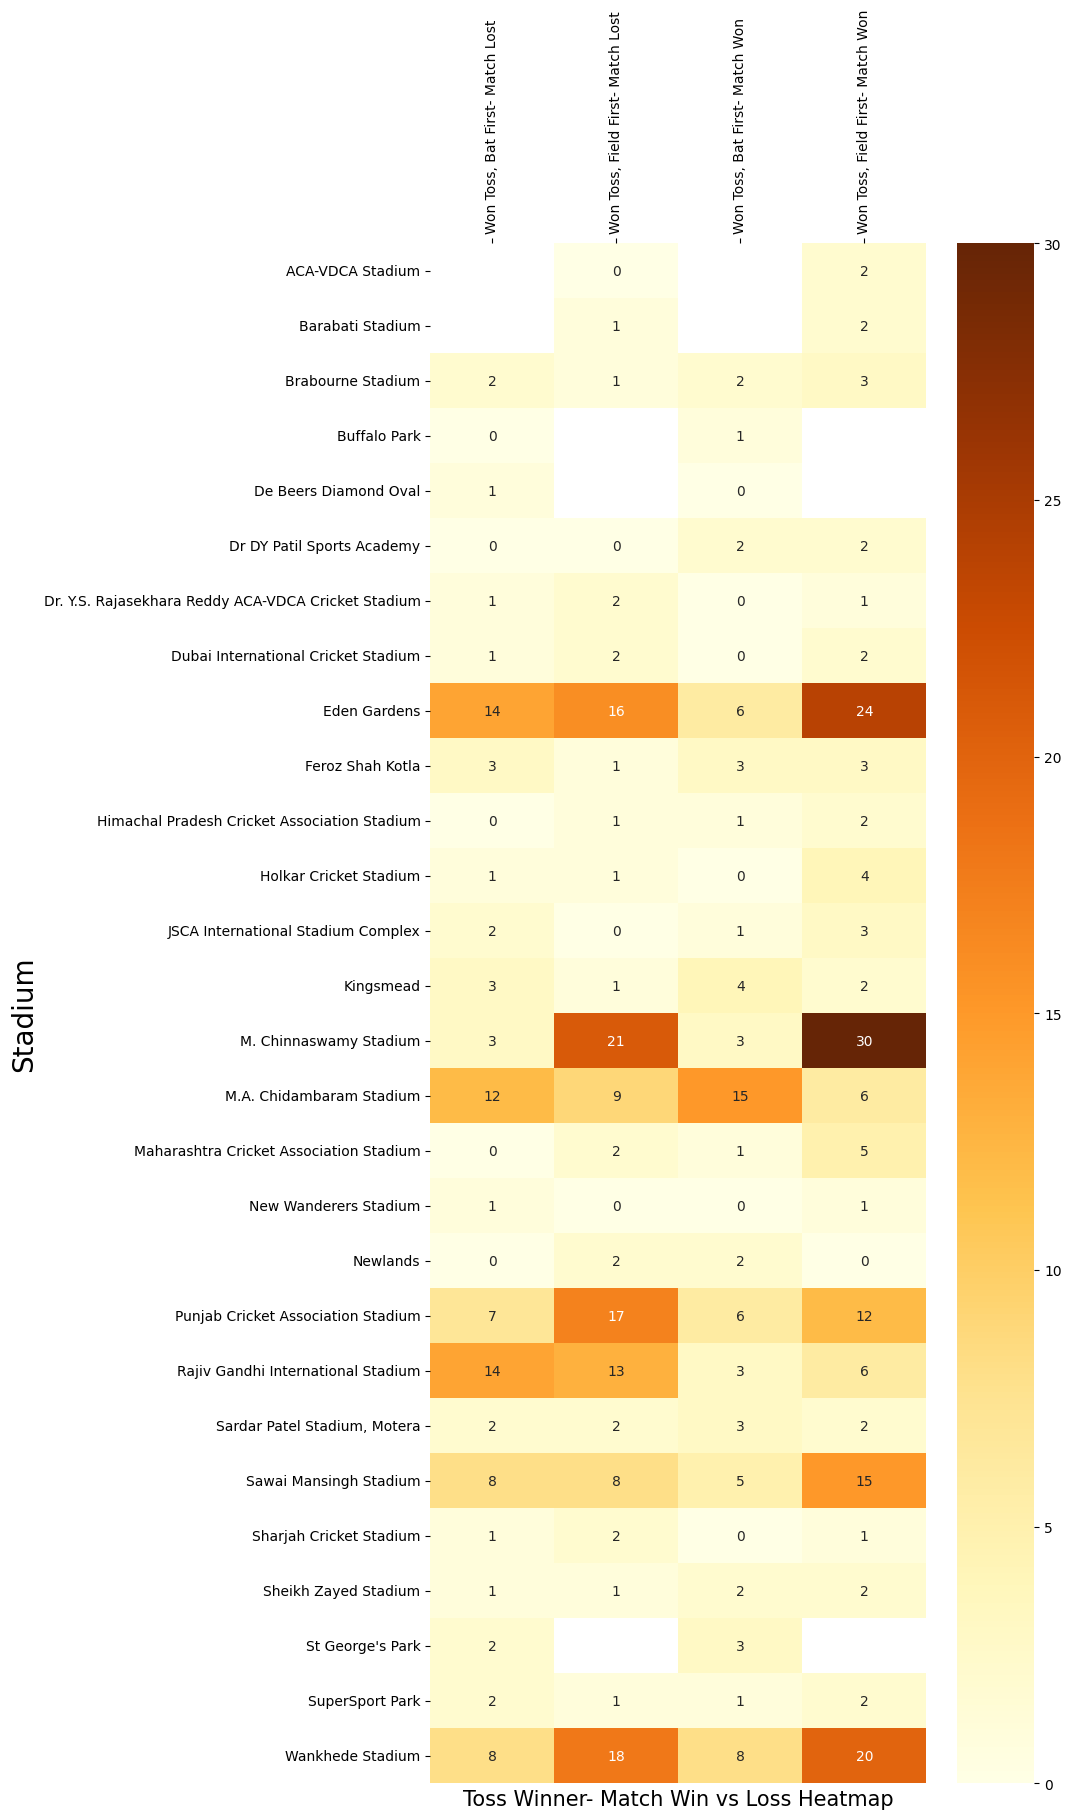

In [26]:
heatmap3_data = pd.pivot_table(merged_venue_data, values=['Toss Winner Wins Match','Toss Winner Lose Match'],
                     index=['venue'],
                     columns='toss_decision')
fig=plt.figure()
fig,ax1=plt.subplots(1,1,figsize=(8,20))
g=sns.heatmap(heatmap3_data,annot=True,cmap='YlOrBr',fmt='g')
g.xaxis.set_ticks_position("top")
g.set_xticklabels(['Won Toss, Bat First- Match Lost','Won Toss, Field First- Match Lost','Won Toss, Bat First- Match Won','Won Toss, Field First- Match Won'],rotation=90)
g.set_xlabel('Toss Winner- Match Win vs Loss Heatmap',size=15)
g.set_ylabel('Stadium',size=20)

**Summary:**

We have now reached the point when we summarise our results. The following points will contain them:

1. The winning Teams have received a small amount of favouritism from the Tournament. What I'm trying to convey is that many games have been played at stadiums like Chinnaswamy, Eden Gardens, Wankhede, etc. Naturally, this gives host teams in these stadiums an advantage, and they have certainly been the most successful squads in Tournament history, such the Chennai Super Kings, Kolkata Knight Riders, Mumbai Indians, etc. Even while this is not the most important component, it still matters.
2. Many players with great promise in the game of cricket have received limited opportunities to play or have been dropped as a result of a few erratic performances. We frequently read about cricket players in the Indian Premier League who have quit the sport and turned to other means of providing for their families.
3. Since every team has the chance to play at least seven games on their home field, most teams have also recorded the majority of their victories there. However, teams like the Mumbai Indians and the Chennai Super Kings have excelled away from home as well. These teams have been the most successful in the history of the IPL for a number of reasons, one of which is that.
4. Most teams' batting and bowling averages are higher in the first innings than the second innings.


Just a few additional data-related points, please:

1. The data source was extremely dependable and tidy. Data cleaning tasks weren't too challenging, and they ultimately made a big difference in the study.
2. The data was extremely thorough—Ball by Ball information from 12 seasons was provided, which is actually a very challenging task to manage. Many thanks for the information!




